In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import uproot
import h5py as h
import pathlib as pb
import os
import glob
import pickle
import pylab

In [2]:
        
def getvalues(file):
    data = h.File(file,'r')
    return data['MC']
                

def getLengths(data,particle,EventLimit=2):
    TotalEvents=int(data['configuration'][2][1])
    print(data['configuration'][25][1])
    Pressure=data['configuration'][25][1].decode("utf-8").split(" ")[0] #Presure in bars
    
    values=np.array([])

    
    if(EventLimit>TotalEvents):
        EventLimit=TotalEvents
        
    for EventID in range(0,EventLimit):
        # obtain current event id
        EventIDMask=data["particles"]["event_id"]==EventID
        
        #store particle infor for this event
        Particles=data["particles"][EventIDMask]["particle_name"]==particle
        length=data["particles"][EventIDMask][Particles]['length']
        values=np.append(values,length)
    return Pressure,values

def PickleITDump(data,fileName):
    with open(fileName,'wb') as f:
        pickle.dump(data,f)
        
def PickleITRead(fileName):
    
    with open(fileName,'rb') as f:
        data=pickle.load(f)
    return data



In [3]:
DTvalues=PickleITRead("DiffusionValues.p")
Efields=np.array(list(DTvalues["DVel"][0].keys()))
for e in Efields:
    DTvalues["DVel"][0][e]=DTvalues["DVel"][0][e]*1e6/10
    

In [4]:
print(DTvalues)

{'DVel': [{100: array([108214.10688434,  96302.76060806,  90686.51034398,  83671.01206446,
        76178.84341615,  65694.81380442,  54272.05510664,  35543.27574089,
        29450.29993861,  28829.43973792]), 300: array([137391.25322104, 116426.4835169 , 109033.23208973, 101982.67118326,
       100738.37119336,  97138.59983321,  93907.79596587,  92631.25549435,
        90396.41408234,  87373.72658136]), 500: array([155549.59033544, 131668.70892333, 121501.18931941, 113736.18191278,
       108707.15496338, 106124.72370379, 103993.9316244 ,  99989.78754902,
        98525.06778832,  96451.33457479])}, {100: array([0.00894605, 0.01022427, 0.00935783, 0.01411652, 0.02068157,
       0.02742147, 0.03159228, 0.02283992, 0.01802855, 0.0233381 ]), 300: array([0.01350003, 0.01561018, 0.00388106, 0.00953334, 0.00931502,
       0.01239928, 0.01007459, 0.01370617, 0.01205301, 0.00740894]), 500: array([0.01409106, 0.01269626, 0.01148031, 0.01069404, 0.0110791 ,
       0.00991213, 0.01004217, 0.010569

In [5]:
#datas=pb.Path("/media/ilker/Ilker/SimResults")

In [6]:
datas=list(sorted(glob.glob("/media/ilker/Ilker/SimResults/Jan24_2023/*.h5")))


In [7]:
print(datas)

['/media/ilker/Ilker/SimResults/Jan24_2023/Pb210_Alphas_10bar.h5', '/media/ilker/Ilker/SimResults/Jan24_2023/Pb210_Alphas_1bar.h5', '/media/ilker/Ilker/SimResults/Jan24_2023/Pb210_Alphas_2bar.h5', '/media/ilker/Ilker/SimResults/Jan24_2023/Pb210_Alphas_3bar.h5', '/media/ilker/Ilker/SimResults/Jan24_2023/Pb210_Alphas_4bar.h5', '/media/ilker/Ilker/SimResults/Jan24_2023/Pb210_Alphas_5bar.h5', '/media/ilker/Ilker/SimResults/Jan24_2023/Pb210_Alphas_6bar.h5', '/media/ilker/Ilker/SimResults/Jan24_2023/Pb210_Alphas_7bar.h5', '/media/ilker/Ilker/SimResults/Jan24_2023/Pb210_Alphas_8bar.h5', '/media/ilker/Ilker/SimResults/Jan24_2023/Pb210_Alphas_9bar.h5']


In [8]:
lengths={}
for data in datas:
    values=getLengths(getvalues(data),b'alpha',100)
    lengths[values[0]]=[np.mean(values[1]),np.std(values[1])]

lengths=dict(sorted(lengths.items(),key=lambda x:x[1],reverse=True))

print(lengths)

b'10 bar'
b'1 bar'
b'2 bar'
b'3 bar'
b'4 bar'
b'5 bar'
b'6 bar'
b'7 bar'
b'8 bar'
b'9 bar'
{'1': [24.63439064025879, 0.47693469171671], '2': [12.174854564666749, 0.177334025215494], '3': [8.118380928039551, 0.09391892219717067], '4': [6.032504320144653, 0.16679612100249067], '5': [4.819045925140381, 0.1372809236794853], '6': [3.9818784475326536, 0.09515290928871403], '7': [3.4000710964202883, 0.08622568045807245], '8': [2.990439462661743, 0.07792275055305285], '9': [2.560645580291748, 0.17786194284514834], '10': [2.4345285654067994, 0.08849043424160481]}


In [9]:

x=np.array([])
y=np.array(list(lengths.keys()))
xerr=np.array([])
for lng,error in list(lengths.values()):
    x=np.append(x,lng)
    xerr=np.append(xerr,error)

Text(0.5, 0, 'Alpha Travel Distance (mm)')

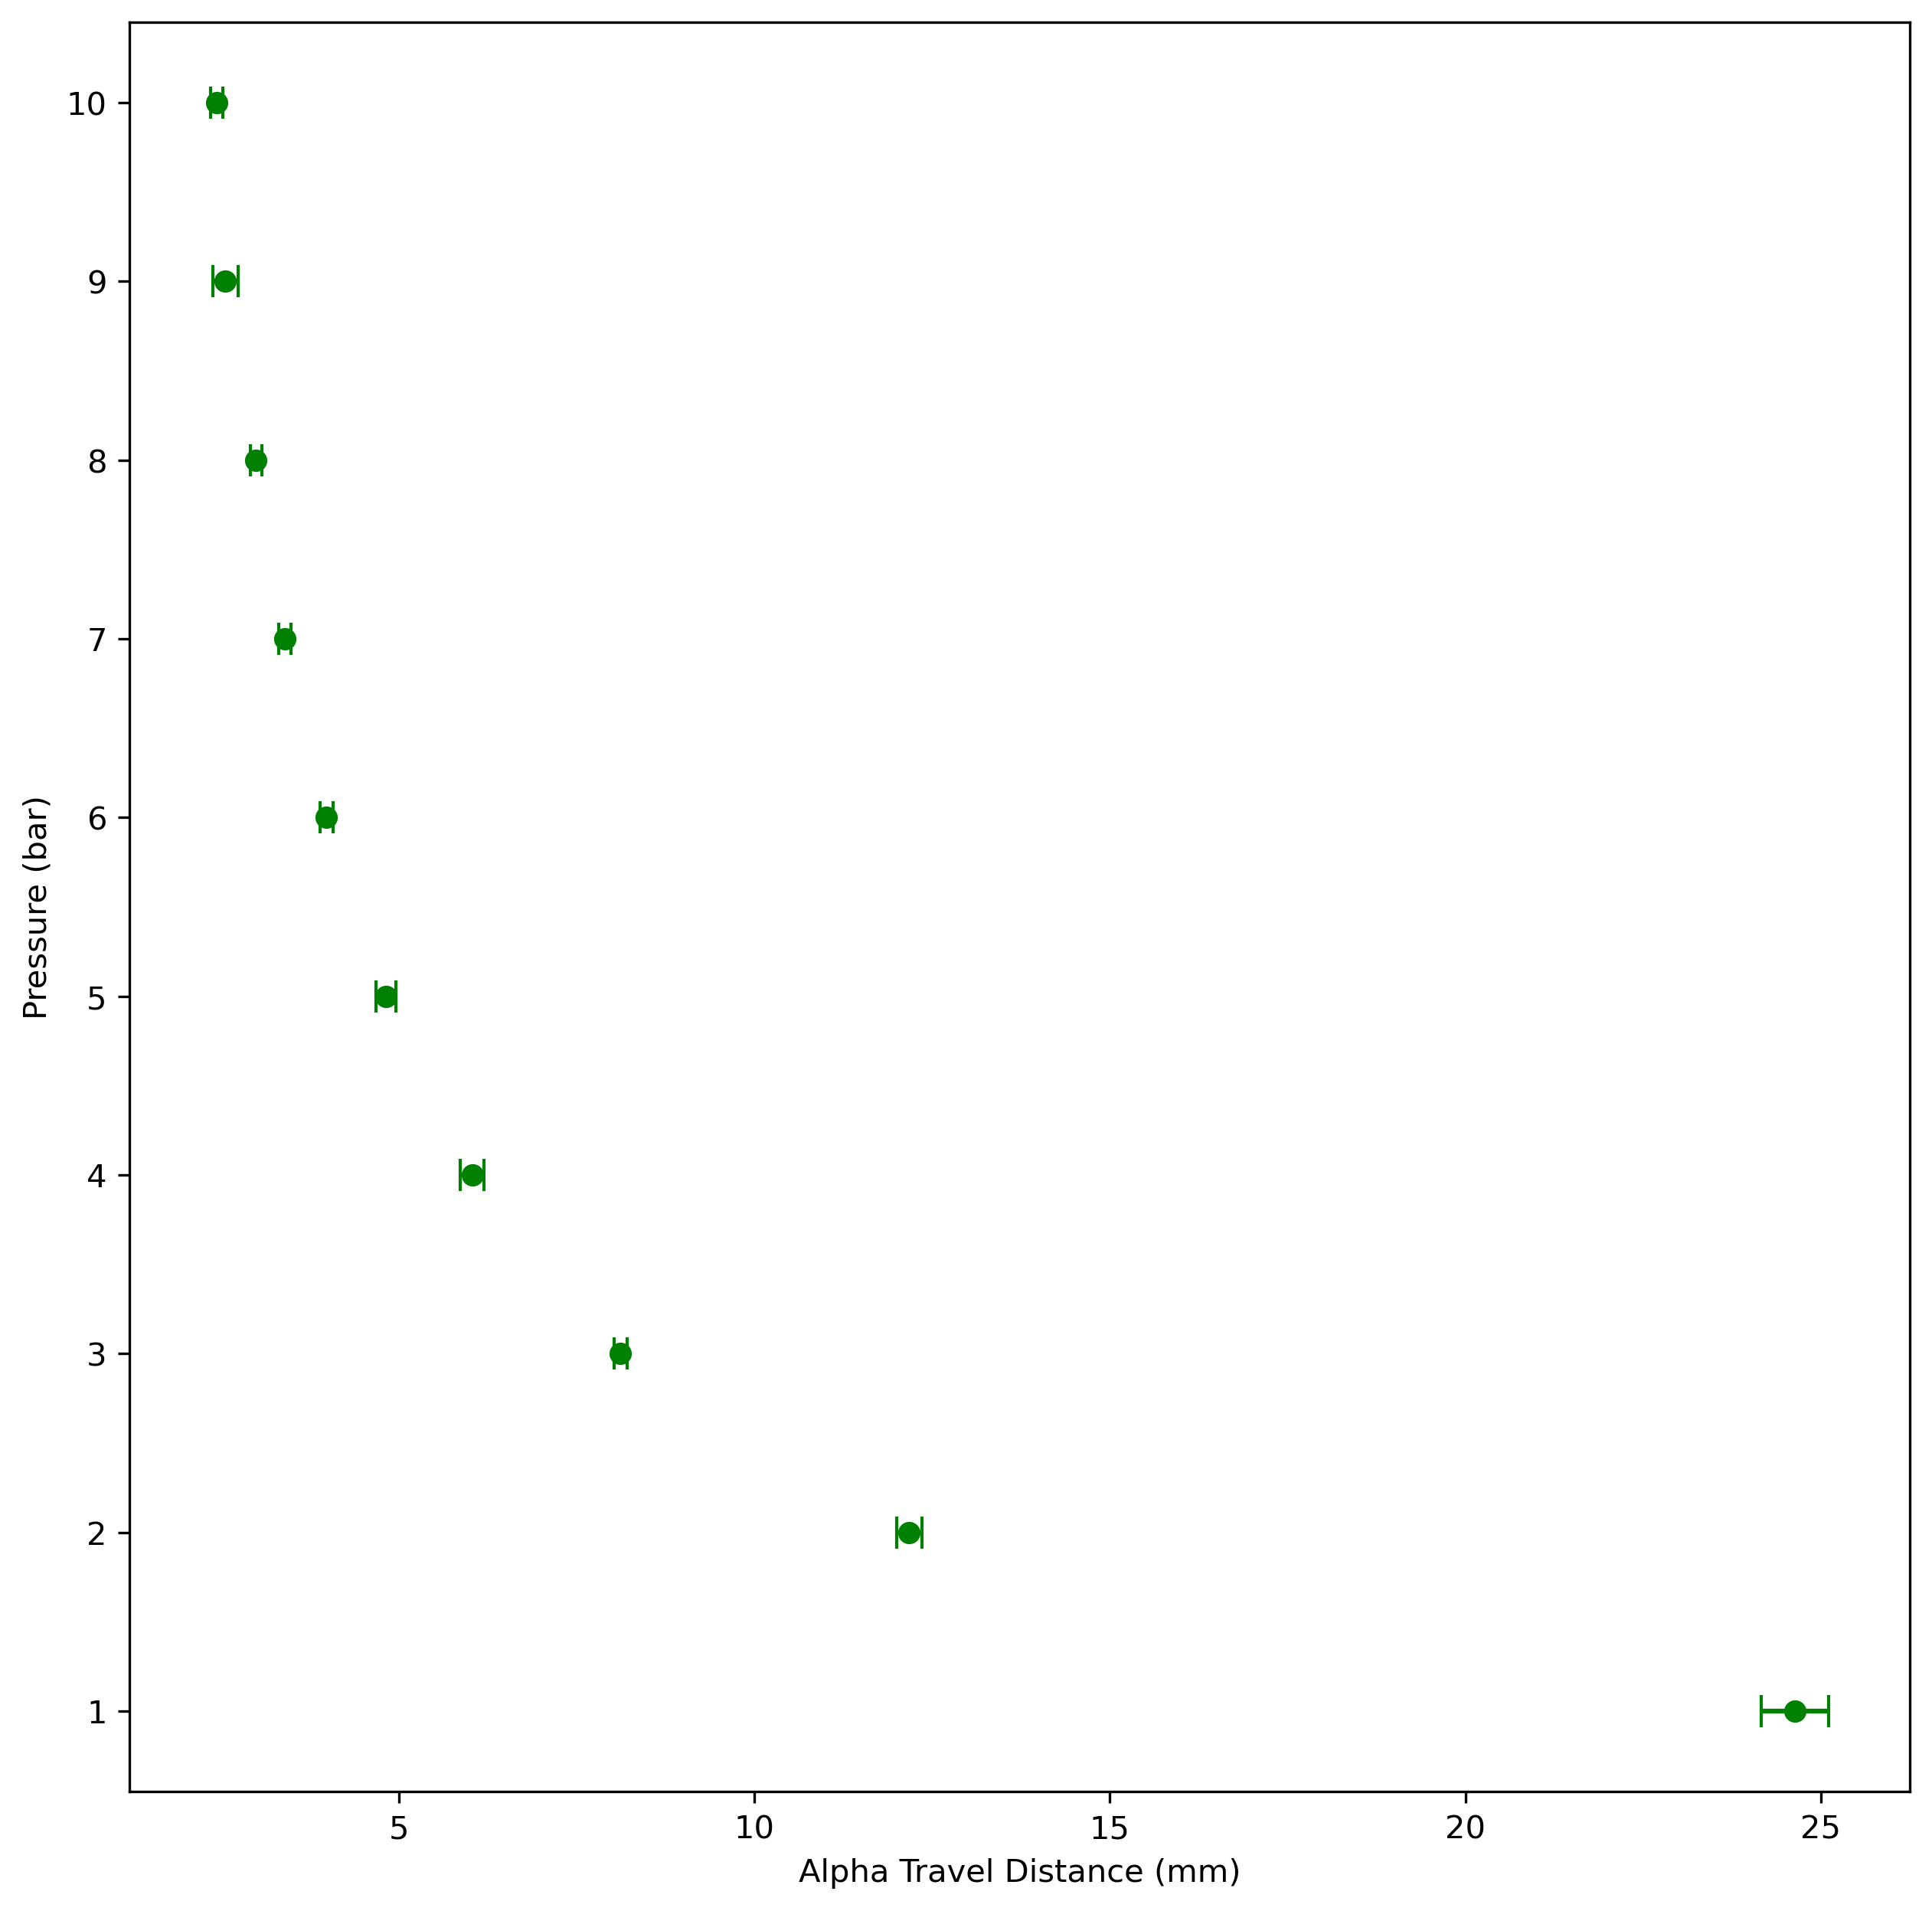

In [10]:
plt.figure(figsize=(10,10),dpi=300)
pylab.errorbar(x=x,y=y,xerr=xerr,color ="green",capsize=5,fmt='o',label="original")
plt.ylabel("Pressure (bar)")
plt.xlabel("Alpha Travel Distance (mm)")


In [11]:
print(x)

[24.63439064 12.17485456  8.11838093  6.03250432  4.81904593  3.98187845
  3.4000711   2.99043946  2.56064558  2.43452857]


In [12]:
Dx=lambda x,t:np.sqrt(2*x*t) ## x is cm^2/2 and t is in seconds
DriftLength=10

In [13]:
print(DTvalues)

{'DVel': [{100: array([108214.10688434,  96302.76060806,  90686.51034398,  83671.01206446,
        76178.84341615,  65694.81380442,  54272.05510664,  35543.27574089,
        29450.29993861,  28829.43973792]), 300: array([137391.25322104, 116426.4835169 , 109033.23208973, 101982.67118326,
       100738.37119336,  97138.59983321,  93907.79596587,  92631.25549435,
        90396.41408234,  87373.72658136]), 500: array([155549.59033544, 131668.70892333, 121501.18931941, 113736.18191278,
       108707.15496338, 106124.72370379, 103993.9316244 ,  99989.78754902,
        98525.06778832,  96451.33457479])}, {100: array([0.00894605, 0.01022427, 0.00935783, 0.01411652, 0.02068157,
       0.02742147, 0.03159228, 0.02283992, 0.01802855, 0.0233381 ]), 300: array([0.01350003, 0.01561018, 0.00388106, 0.00953334, 0.00931502,
       0.01239928, 0.01007459, 0.01370617, 0.01205301, 0.00740894]), 500: array([0.01409106, 0.01269626, 0.01148031, 0.01069404, 0.0110791 ,
       0.00991213, 0.01004217, 0.010569

In [14]:
print(x)
sigFactor=6
DT={}
DT_error={}
DL={}
DL_error={}
LengthError=0.5*np.ones(10)
for e in Efields:
    #k= np.pi*((x/2)**2)+(DriftLength/DTvalues["DVel"][0][e])*DTvalues["DT"][0][e]
    #print(f"Electrical Fields --> {e}" )
    #print(np.sqrt(k))
    print(f"---- Diffusion Test @ {e} ---")
    sigmT=np.sqrt((2*(DriftLength/DTvalues["DVel"][0][e])*DTvalues["DT"][0][e]))
    errorsigma=np.sqrt((LengthError/10)**2+(DTvalues["DVel"][1][e]/DTvalues["DVel"][0][e])**2+(DTvalues["DT"][1][e]/DTvalues["DT"][0][e])**2)
    DT_error[e]=errorsigma*2*(x/2+sigFactor*sigmT)
    DT[e]=2*(x/2+sigFactor*sigmT)
    sigmL=np.sqrt((2*(DriftLength/DTvalues["DVel"][0][e])*DTvalues["DL"][0][e]))
    errorsigma=np.sqrt((LengthError/10)**2+(DTvalues["DVel"][1][e]/DTvalues["DVel"][0][e])**2+(DTvalues["DL"][1][e]/DTvalues["DL"][0][e])**2)
    DL_error[e]=errorsigma*2*(x/2+sigFactor*sigmL)
    DL[e]=2*(x/2+sigFactor*sigmL)


[24.63439064 12.17485456  8.11838093  6.03250432  4.81904593  3.98187845
  3.4000711   2.99043946  2.56064558  2.43452857]
---- Diffusion Test @ 100 ---
---- Diffusion Test @ 300 ---
---- Diffusion Test @ 500 ---


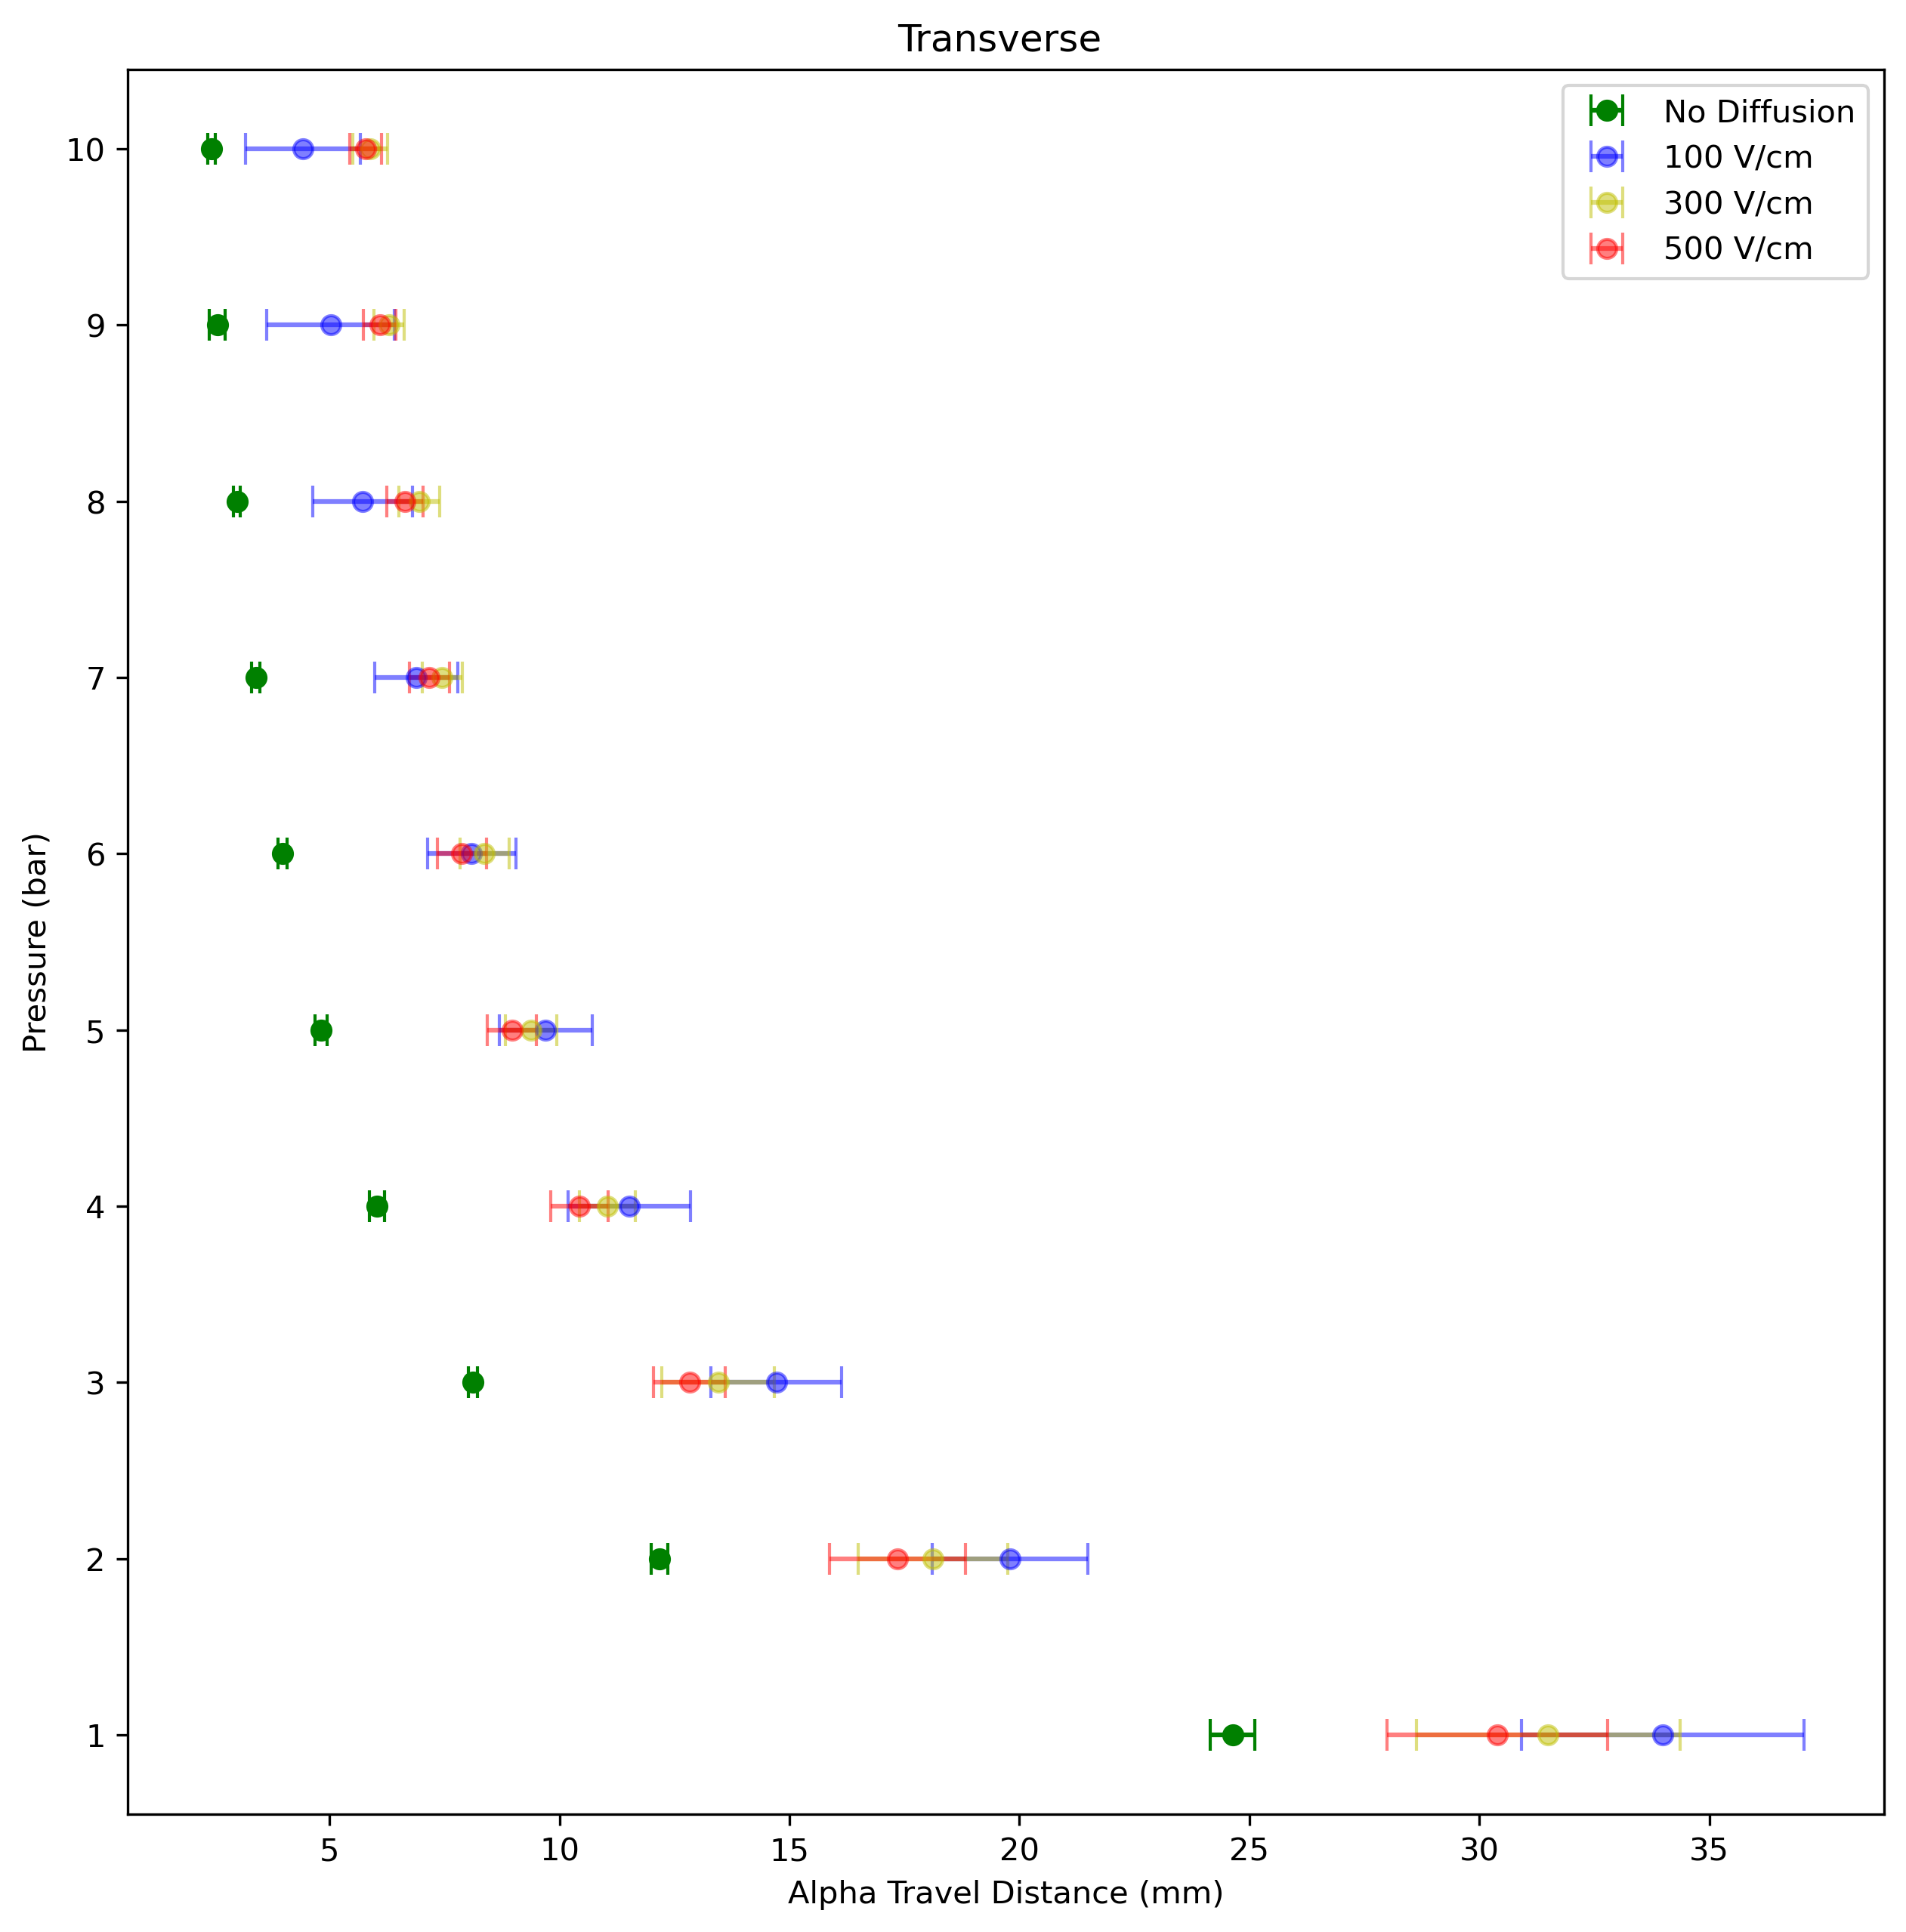

In [15]:
pylab.figure(figsize=(10,10),dpi=300)
pylab.title("Transverse ")
pylab.errorbar(x=x,y=y,xerr=xerr,color ="green",capsize=5,fmt='o',label="No Diffusion")
pylab.errorbar(x=DT[100],y=y,xerr=DT_error[100],color = "b",label="100 V/cm",capsize=5,fmt='o',alpha=0.5)
pylab.errorbar(x=DT[300],y=y,xerr=DT_error[300],color = "y",label="300 V/cm",capsize=5,fmt='o',alpha=0.5)
pylab.errorbar(x=DT[500],y=y,xerr=DT_error[500],color = "r",label="500 V/cm",capsize=5,fmt='o',alpha=0.5)



pylab.ylabel("Pressure (bar)")
pylab.xlabel("Alpha Travel Distance (mm)")
pylab.legend()

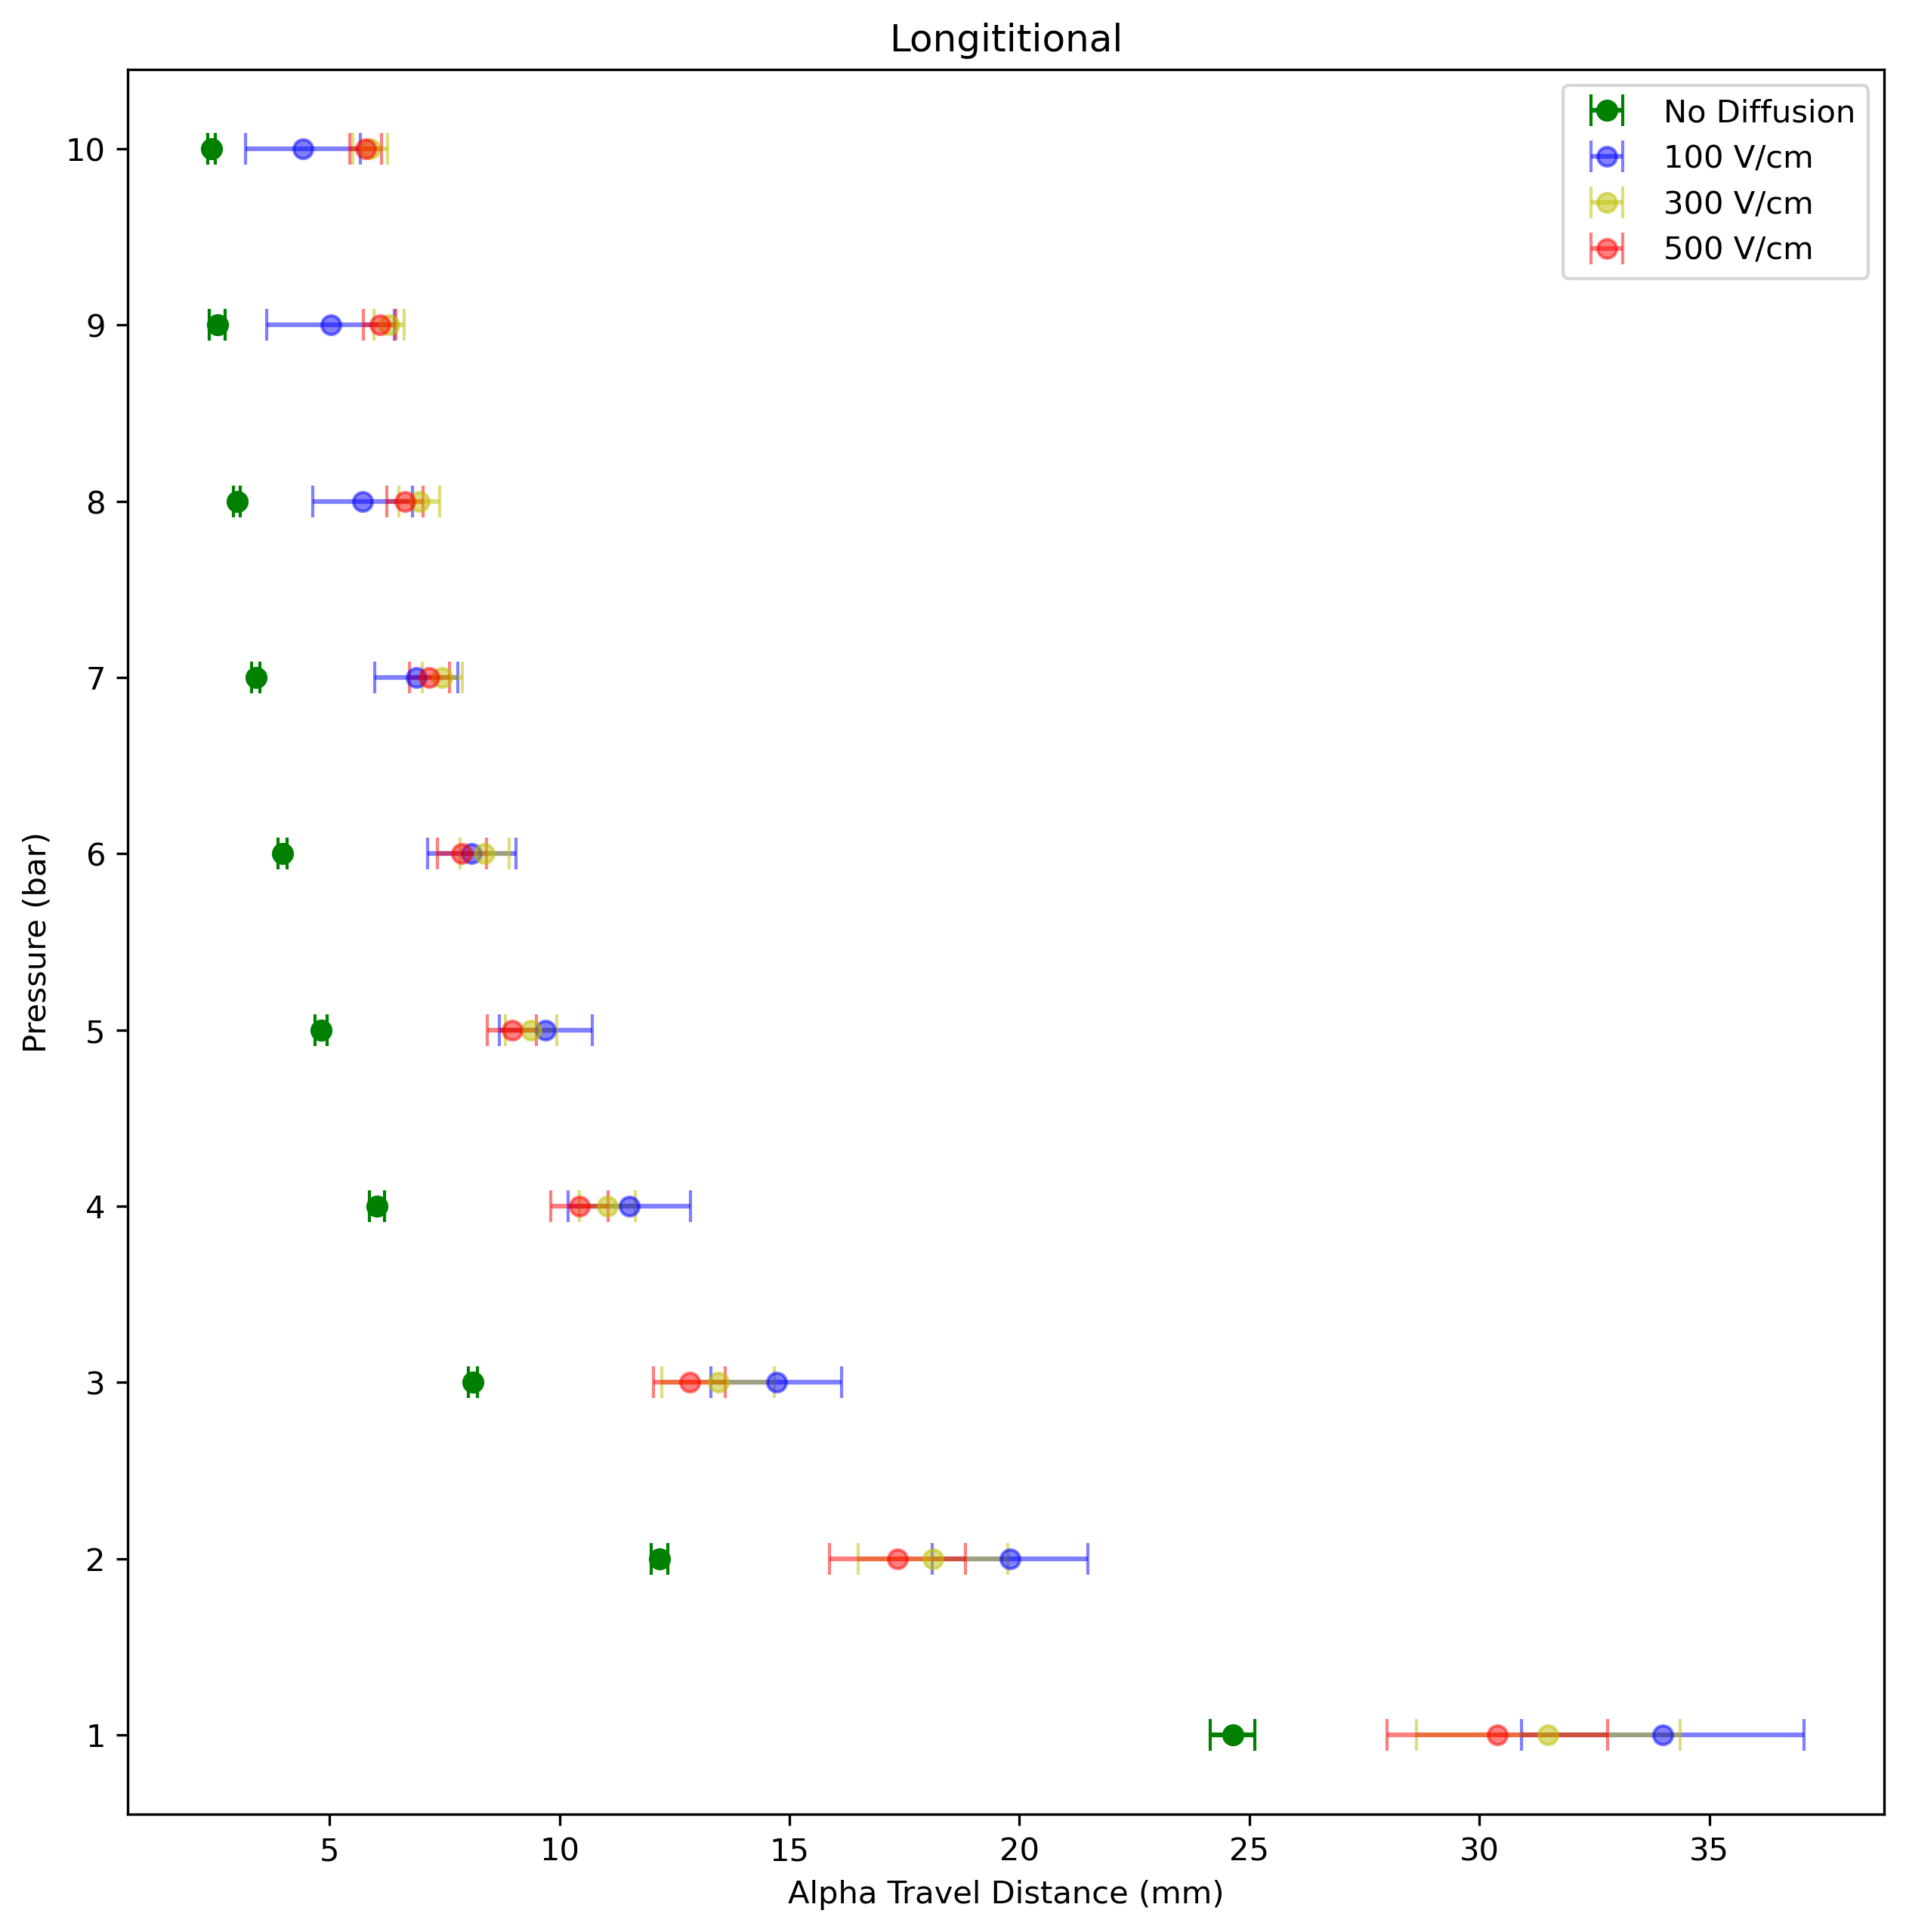

In [16]:
pylab.figure(figsize=(10,10),dpi=300)
pylab.title("Longititional")
pylab.errorbar(x=x,y=y,xerr=xerr,color ="green",capsize=5,fmt='o',label="No Diffusion")
pylab.errorbar(x=DL[100],y=y,xerr=DL_error[100],color = "b",label="100 V/cm",capsize=5,fmt='o',alpha=0.5)
pylab.errorbar(x=DL[300],y=y,xerr=DL_error[300],color = "y",label="300 V/cm",capsize=5,fmt='o',alpha=0.5)
pylab.errorbar(x=DL[500],y=y,xerr=DL_error[500],color = "r",label="500 V/cm",capsize=5,fmt='o',alpha=0.5)



pylab.ylabel("Pressure (bar)")
pylab.xlabel("Alpha Travel Distance (mm)")
pylab.legend()